In [5]:
# 리스트 5-1-(1)
# 나이와 키의 관계?? 정보?? 를 저장하는 리스트! , 임의로 트레이닝 데이터 셋을 만들어서 훈련 시키기
import numpy as np
import matplotlib.pyplot as plt  # plt라는 객체 생성(라이브러리를 import해서)
%matplotlib inline  # 화면에 표시하기 위해서 필요한 코드


# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정 => 이 시드 값에 따라서 랜덤한 값(난수)이 달라짐. 항상 같은 패턴의 랜덤값이 출력되게 됨.
X_min = 4 # X의 하한(표시 용)
X_max = 30 # X의 상한(표시 용)
X_n = 16 # X의 상한(표시 용)

# 랜덤한 X의 원소 값(5 ~ 30)으로 1xX_n 크기의 행렬 X 
X=5+25*np.random.rand(X_n) # 0~25의 값에다가 5씩 더해주므로, 5~30 사이의 수 중에서 랜덤한 값 갖도록 생성

Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)  => 이 파일 있는 폴더에 .npz 파일 하나 생성되어 있을 것.

In [6]:
# 리스트 5-1-(2)
print(X)
# 모두 5~30 사이의 값을 가지게 된 것을 확인할 수 있음.

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [8]:
# 리스트 5-1-(3)
#  X 벡터의 원소값을 => "소수점 이하 2째 자리까지" 출력
print(np.round(X,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [9]:
# 리스트 5-1-(4)
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


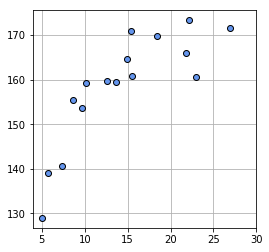

In [10]:
# 리스트 5-1-(5)
# 데이터 그래프 ------------------------------
plt.figure(figsize=(4, 4))

# X 와 T 벡터를 그래프 출력 : marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue'
# plt라는 객체의 plot라는 함수 써서 그래프의 모양 설정해주기
plt.plot(X,T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
# marker='o' : 마커(점)의 모양을 o모양으로.. 원모양으로 해라!

# X의 축의 범위: X_min ~ X_max 지정
plt.xlim(X_min, X_max)  # (4,30)

# gird 표시함
plt.grid(True)

plt.show()


[[120.         120.         120.         ... 120.         120.
  120.        ]
 [120.50505051 120.50505051 120.50505051 ... 120.50505051 120.50505051
  120.50505051]
 [121.01010101 121.01010101 121.01010101 ... 121.01010101 121.01010101
  121.01010101]
 ...
 [168.98989899 168.98989899 168.98989899 ... 168.98989899 168.98989899
  168.98989899]
 [169.49494949 169.49494949 169.49494949 ... 169.49494949 169.49494949
  169.49494949]
 [170.         170.         170.         ... 170.         170.
  170.        ]]
[[-25.         -24.49494949 -23.98989899 ...  23.98989899  24.49494949
   25.        ]
 [-25.         -24.49494949 -23.98989899 ...  23.98989899  24.49494949
   25.        ]
 [-25.         -24.49494949 -23.98989899 ...  23.98989899  24.49494949
   25.        ]
 ...
 [-25.         -24.49494949 -23.98989899 ...  23.98989899  24.49494949
   25.        ]
 [-25.         -24.49494949 -23.98989899 ...  23.98989899  24.49494949
   25.        ]
 [-25.         -24.49494949 -23.98989899 ...  23

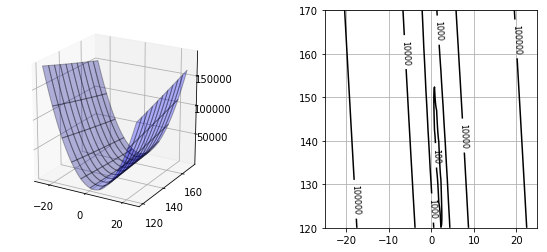

In [14]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D

# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse=np.mean((y-t)**2)  # mse : mean square error 계산 / y-t는 벡터의 계산, 이 뺀 값을 제곱해서 다 더해서 평균값(총 16개의 원소)
    return mse

# 계산 --------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

# 교수님이 쉅시간에 출력해보라고 하신 두 줄 => 행렬 어떤식으로 나오는지..?(녹음 참조) 
print(xx1) 
print(xx0)

# J 목적 함수 계산
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X,T, (x0[i0], x1[i1]))


# 표시 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')

# J 목적함수를 3차원 입체 그래프로 표현: rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black'
ax.plot_surface(xx0,xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')

ax.set_xticks([-20, 0, 20]) 
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)

# J 목적함수를 3차원 윤곽선 그래프로 표현: 
cont=plt.contour(xx0, xx1, J, 30, colors='black', levels=[100,1000,10000,100000])

cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


In [23]:
# 리스트 5-1-(7)
# 평균 제곱 오차의 기울기 ------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    
    
# d_w0: 목적 함수에 대한 w0의 미분값, d_w1:목적 함수에 대한 w01의 미분값

    return d_w0, d_w1


In [24]:
# 리스트 5-1-(8)

# w0= 10, w1=165로 초기화

print(np.round(d_w, 1))


[5046.3  301.8]


반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


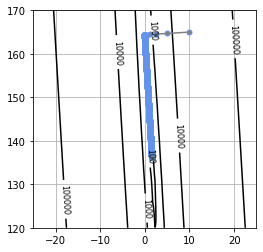

In [25]:
# 리스트 5-1-(9)
# 구배법 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    
# w_i 업데이트     





# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)

# 구배법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)


# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


w0=1.540, w1=136.176
SD=7.002 cm


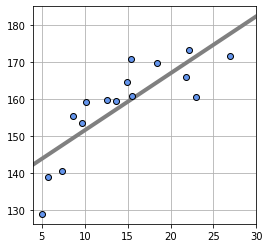

In [27]:
# 리스트 5-1-(10)
# 선 표시 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
#선 그리기     



# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))

# mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()
